In [ ]:
import numpy as np 
import pandas as pd  
from sklearn.decomposition import PCA 
  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#MNIST hand written digits dataset

In [ ]:
from sklearn import datasets

In [ ]:
#dir(datasets)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
data1=pd.DataFrame(digits.data)

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

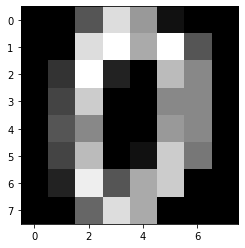

In [ ]:
plt.imshow(digits.images[0], cmap=plt.cm.gray)

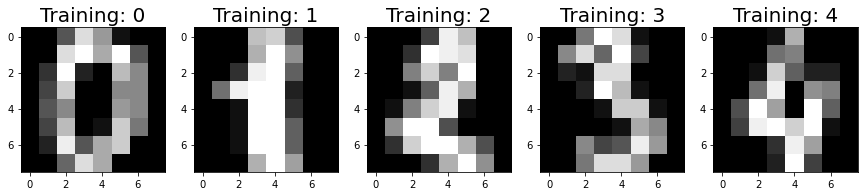

In [ ]:
#Displaying some of the images and labels
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}", fontsize=20 )  

In [ ]:
x=digits.data
y=digits.target

In [ ]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
x.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Data Normalization
X_std = StandardScaler().fit_transform(x)

In [ ]:
X_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X_std.shape

(1797, 64)

In [ ]:
x1=X_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [ ]:
eig_vals.shape

NameError: ignored

In [ ]:
cov_mat = np.cov(X_std.T)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)#

In [ ]:
eig_vecs.shape

(64, 64)

In [ ]:
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
var_exp

[12.033916097734892,
 9.561054403097872,
 8.44441489262455,
 6.498407907524166,
 4.860154875966405,
 4.214119869271941,
 3.9420828035673914,
 3.389380924638329,
 2.9982210116252284,
 2.932002551252217,
 2.781805463550336,
 2.5770550925819915,
 2.2753033157642415,
 2.227179739514352,
 2.165229431849246,
 1.9141666064421354,
 1.7755470851681932,
 1.638069274284425,
 1.5964601688623532,
 1.4891911870878218,
 1.3479695658179345,
 1.2719313702347557,
 1.1658373505919533,
 1.0576465985363201,
 0.9753159471981104,
 0.9445589897319973,
 0.8630138269707223,
 0.8366428536685113,
 0.7976932484112407,
 0.7464713709260609,
 0.7255821513702755,
 0.6919112454811812,
 0.6539085355726171,
 0.6407925738459863,
 0.5913841117223418,
 0.5711624052235242,
 0.5236368034166353,
 0.48180758644514354,
 0.4537192598584495,
 0.42316275323277974,
 0.4060530699790385,
 0.3970848082758281,
 0.3564933031426166,
 0.34078718147029996,
 0.3278353352879543,
 0.3110320073453573,
 0.28857529410893396,
 0.2764892635235467,


In [ ]:
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

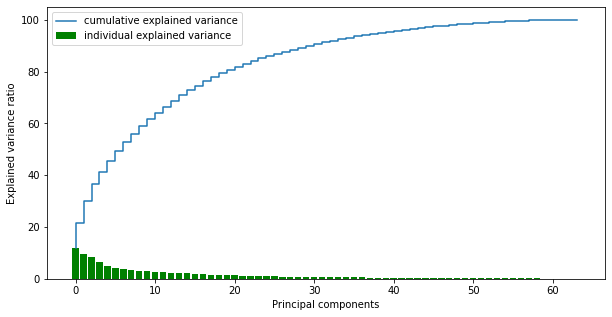

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y, train_size=0.8)

In [ ]:
pca = PCA(n_components=25)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)#same chnages will ge applied on x test dataset

In [ ]:
rf=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [ ]:
predicted=rf.predict(pca_x_test)

In [ ]:
predicted

array([1, 4, 8, 6, 2, 0, 4, 5, 0, 9, 6, 5, 3, 3, 8, 0, 2, 2, 8, 3, 8, 9,
       8, 1, 5, 7, 7, 0, 0, 9, 1, 1, 8, 9, 1, 3, 4, 1, 6, 5, 1, 9, 1, 4,
       6, 7, 7, 5, 8, 5, 3, 0, 5, 0, 0, 9, 7, 9, 1, 2, 3, 8, 2, 4, 4, 1,
       5, 9, 1, 2, 3, 2, 6, 4, 8, 4, 5, 3, 3, 1, 7, 9, 0, 8, 0, 8, 4, 1,
       6, 8, 7, 2, 8, 3, 1, 6, 6, 9, 5, 6, 9, 6, 3, 4, 2, 6, 7, 9, 7, 5,
       6, 5, 9, 8, 7, 7, 5, 6, 9, 7, 7, 3, 4, 5, 0, 1, 3, 6, 9, 4, 0, 6,
       2, 5, 7, 4, 1, 0, 5, 1, 8, 2, 5, 4, 1, 2, 4, 0, 4, 1, 0, 3, 3, 2,
       4, 3, 2, 2, 7, 6, 4, 4, 1, 3, 8, 1, 3, 0, 0, 5, 2, 3, 7, 1, 1, 3,
       7, 2, 1, 4, 5, 6, 6, 3, 1, 8, 0, 9, 1, 9, 4, 6, 4, 4, 6, 1, 5, 1,
       5, 9, 1, 1, 7, 9, 6, 2, 9, 2, 8, 3, 0, 1, 4, 2, 3, 5, 4, 0, 9, 9,
       3, 1, 5, 7, 3, 4, 5, 9, 5, 7, 7, 7, 1, 6, 8, 3, 7, 1, 4, 2, 3, 4,
       5, 2, 5, 5, 8, 1, 7, 6, 7, 9, 2, 0, 2, 7, 6, 9, 9, 8, 6, 0, 7, 5,
       6, 3, 1, 4, 1, 9, 4, 5, 9, 3, 8, 6, 3, 0, 1, 8, 9, 3, 8, 4, 8, 6,
       8, 7, 6, 5, 3, 4, 4, 8, 7, 3, 7, 4, 9, 3, 7,

In [ ]:
accuracy_score(predicted,y_test)

0.8277777777777777

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
for i,a in enumerate([2,3,4,54]):
    print(i,a)

0 2
1 3
2 4
3 54


In [ ]:
predicted

array([1, 4, 8, 6, 2, 0, 4, 5, 0, 9, 6, 5, 3, 3, 8, 0, 2, 2, 8, 3, 8, 9,
       8, 1, 5, 7, 7, 0, 0, 9, 1, 1, 8, 9, 1, 3, 4, 1, 6, 5, 1, 9, 1, 4,
       6, 7, 7, 5, 8, 5, 3, 0, 5, 0, 0, 9, 7, 9, 1, 2, 3, 8, 2, 4, 4, 1,
       5, 9, 1, 2, 3, 2, 6, 4, 8, 4, 5, 3, 3, 1, 7, 9, 0, 8, 0, 8, 4, 1,
       6, 8, 7, 2, 8, 3, 1, 6, 6, 9, 5, 6, 9, 6, 3, 4, 2, 6, 7, 9, 7, 5,
       6, 5, 9, 8, 7, 7, 5, 6, 9, 7, 7, 3, 4, 5, 0, 1, 3, 6, 9, 4, 0, 6,
       2, 5, 7, 4, 1, 0, 5, 1, 8, 2, 5, 4, 1, 2, 4, 0, 4, 1, 0, 3, 3, 2,
       4, 3, 2, 2, 7, 6, 4, 4, 1, 3, 8, 1, 3, 0, 0, 5, 2, 3, 7, 1, 1, 3,
       7, 2, 1, 4, 5, 6, 6, 3, 1, 8, 0, 9, 1, 9, 4, 6, 4, 4, 6, 1, 5, 1,
       5, 9, 1, 1, 7, 9, 6, 2, 9, 2, 8, 3, 0, 1, 4, 2, 3, 5, 4, 0, 9, 9,
       3, 1, 5, 7, 3, 4, 5, 9, 5, 7, 7, 7, 1, 6, 8, 3, 7, 1, 4, 2, 3, 4,
       5, 2, 5, 5, 8, 1, 7, 6, 7, 9, 2, 0, 2, 7, 6, 9, 9, 8, 6, 0, 7, 5,
       6, 3, 1, 4, 1, 9, 4, 5, 9, 3, 8, 6, 3, 0, 1, 8, 9, 3, 8, 4, 8, 6,
       8, 7, 6, 5, 3, 4, 4, 8, 7, 3, 7, 4, 9, 3, 7,

In [ ]:
y_test

array([7, 4, 8, 6, 2, 0, 4, 5, 0, 9, 6, 9, 3, 3, 9, 0, 2, 2, 8, 3, 8, 9,
       9, 1, 0, 7, 7, 0, 0, 9, 1, 1, 8, 9, 8, 3, 4, 1, 6, 7, 1, 9, 1, 4,
       6, 7, 7, 5, 1, 5, 3, 0, 5, 0, 5, 5, 7, 5, 2, 2, 3, 8, 2, 4, 4, 6,
       5, 9, 1, 2, 3, 2, 6, 4, 3, 4, 5, 8, 3, 8, 7, 9, 0, 8, 0, 8, 4, 1,
       6, 8, 7, 2, 8, 3, 2, 6, 6, 9, 5, 6, 8, 0, 3, 4, 2, 6, 7, 9, 5, 5,
       6, 5, 7, 8, 7, 7, 5, 6, 9, 7, 7, 3, 4, 5, 0, 1, 3, 6, 9, 4, 0, 6,
       2, 0, 7, 9, 1, 0, 5, 1, 8, 2, 3, 4, 1, 2, 4, 0, 4, 9, 7, 3, 5, 2,
       4, 8, 2, 2, 7, 6, 4, 4, 1, 2, 9, 1, 3, 0, 0, 5, 2, 3, 2, 1, 1, 3,
       7, 2, 8, 4, 5, 0, 6, 3, 1, 8, 0, 8, 1, 9, 4, 6, 7, 7, 6, 1, 5, 1,
       5, 5, 1, 1, 7, 9, 6, 2, 9, 2, 8, 3, 0, 1, 0, 2, 8, 5, 4, 0, 9, 9,
       3, 1, 5, 7, 3, 4, 9, 9, 5, 7, 7, 7, 1, 6, 2, 3, 7, 1, 4, 2, 3, 4,
       5, 2, 5, 5, 9, 1, 5, 6, 7, 9, 2, 0, 2, 7, 6, 9, 9, 8, 6, 0, 7, 5,
       6, 3, 2, 4, 1, 9, 4, 5, 9, 8, 8, 6, 8, 0, 7, 8, 8, 3, 8, 4, 8, 6,
       7, 7, 6, 5, 3, 4, 4, 8, 7, 3, 9, 4, 5, 3, 7,

In [ ]:
y_test.shape

(360,)

In [ ]:
def get_misclassified_index(y_pred,y_test):
    misclassification=[]#help us out to get the misclassified index value
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
            
    return misclassification

In [ ]:
misclassification = get_misclassified_index(predicted,y_test)

In [ ]:
misclassification[:5]

In [ ]:
def plot_misclassifications(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
        plt.title("Predicted:{} Actual:{}".format(predicted[wrong],y_test[wrong]))

ValueError: ignored

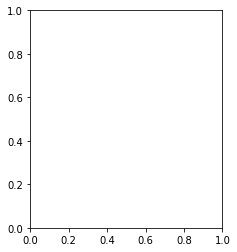

In [ ]:
plot_misclassifications(misclassification)